In [1]:
import shap
import qiime2
from sklearn.pipeline import Pipeline
import pandas as pd
import biom
%matplotlib inline
shap.initjs()
import matplotlib.pyplot as plt

In [2]:
def shapley_values(table: biom.Table,
                   sample_estimator: Pipeline) -> pd.DataFrame:
    models = sample_estimator['est']
    explainer = shap.TreeExplainer(models)
    features = table.to_dataframe()
    featureids = sample_estimator.named_steps.dv.get_feature_names()
    features = features.loc[featureids]
    shap_values = explainer.shap_values(features.T.values)
    sampleids = table.ids()
    shap_values = pd.DataFrame(shap_values, index=sampleids,
                               columns=featureids)
    return shap_values

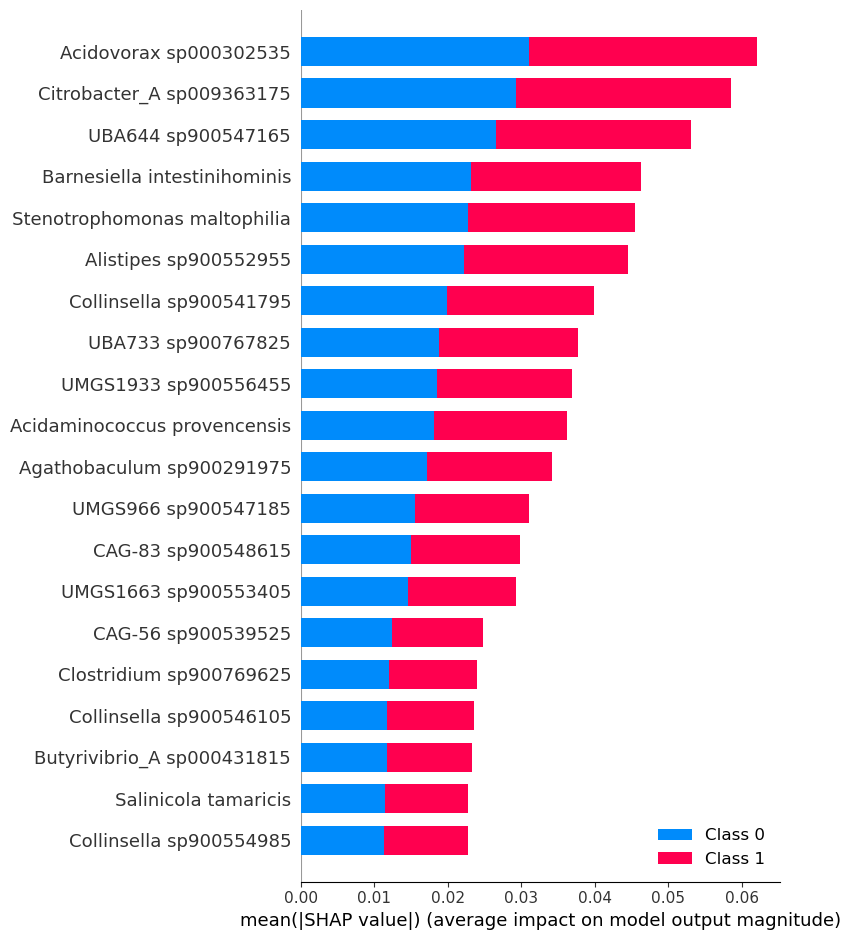

In [3]:
#Dan2020ASD Random Forest
fname = '../../../snakemake/data/Dan2020ASD_rl150/classify/moving-pictures-classifier/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Dan2020ASD_rl150/classify/moving-pictures-classifier/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Dan2020ASD_rl150/Dan2020ASD.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Dan2020ASD_rl150/metadata_simple.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Dan2020ASD_rl150/classify/moving-pictures-classifier/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

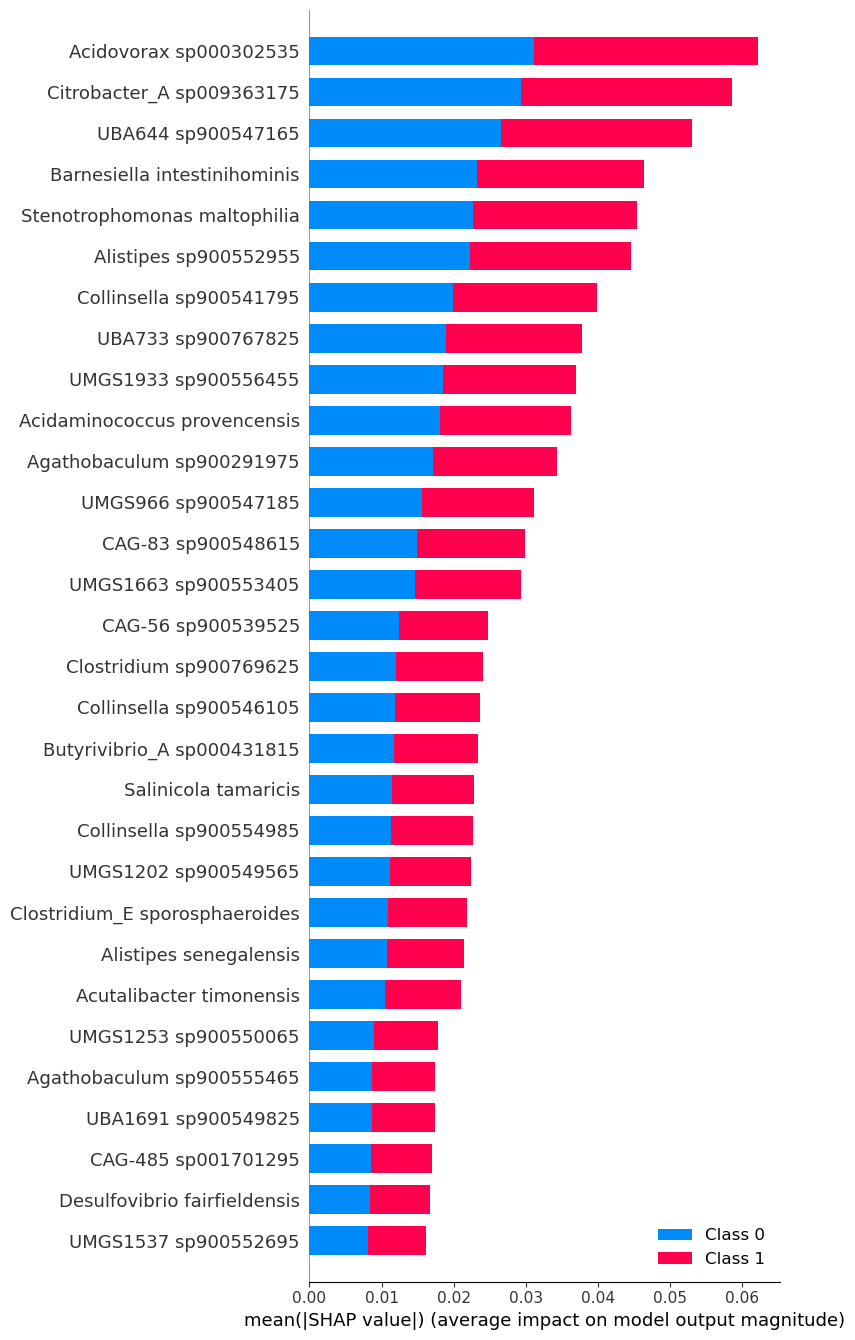

In [4]:
shap.summary_plot(shap_values, X_test, max_display=30)

In [5]:
import numpy as np
np.array(shap_values).shape

(2, 12, 2057)

In [16]:
fname = '../../../snakemake/data/Dan2020ASD_rl150/Dan2020ASD.biom'
table = biom.load_table(fname).to_dataframe()
feature_names = table.index
# Create a DataFrame with the Shapley values and feature names
shap_values_df = pd.DataFrame(shap_values, columns=feature_names)

# Save the DataFrame to a CSV file (replace 'shap_values.csv' with your desired filename)
shap_values_df.to_csv('shap_values.csv', index=False)

ValueError: Must pass 2-d input. shape=(2, 12, 2057)